In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Link: https://www.data-blogger.com/2017/11/15/python-matplotlib-pyplot-a-perfect-combination/
data_path = "home-credit-default-risk/application_train.csv"
pdf_data = pd.read_csv(data_path)
pdf_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Pie chart (Categorical)

In [3]:
# counting gender group
pdf00 = pdf_data[pdf_data["CODE_GENDER"].isin(["M", "F"])]
pdf00 = pdf00.groupby("CODE_GENDER").size()
pdf00

CODE_GENDER
F    202448
M    105059
dtype: int64

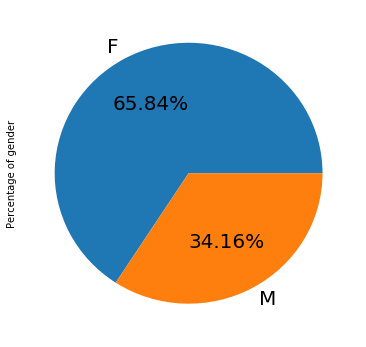

In [4]:
# pie plot
pdf00.name = "Percentage of gender"
pdf00.plot.pie(figsize=(6, 6), autopct="%.2f%%", fontsize=20)
plt.show()

# Word cloud (Categorical)

In [5]:
# get sequence of education types
text = " ".join(pdf_data["NAME_EDUCATION_TYPE"].tolist())
text[:100]

'Secondary / secondary special Higher education Secondary / secondary special Secondary / secondary s'

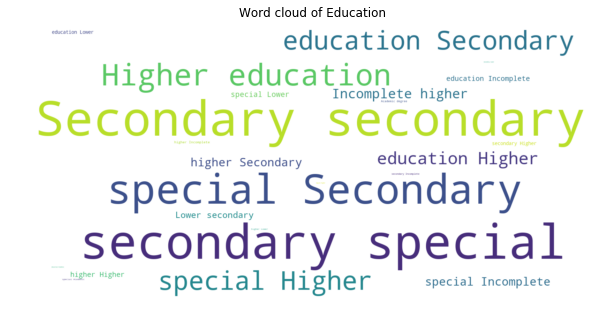

In [6]:
# generate wordcloud
wordcloud = WordCloud(background_color="white", width=1600, height=800).generate(text)

# plot wordcloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word cloud of Education")
plt.show()

# Bar chart (Categorical, Discrete)

In [7]:
# counting gender group
pdf00 = pdf_data[pdf_data["CODE_GENDER"].isin(["M", "F"])]
pdf00 = pdf00.groupby("CODE_GENDER").size()
pdf00

CODE_GENDER
F    202448
M    105059
dtype: int64

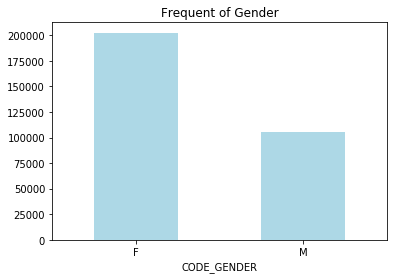

In [8]:
# bar plot
pdf00.plot.bar(rot=0, color="lightblue", title="Frequent of Gender")
plt.show()

# Bar plot (group vs stacked)

In [9]:
# group gender by target
pdf00 = pdf_data[pdf_data["CODE_GENDER"] != "XNA"]
pdf00 = pdf00.groupby(["TARGET", "CODE_GENDER"]).agg({"CODE_GENDER": "count"})

# rename column
pdf00.columns = ["count"]

# pivot table for plotting
pdf00 = pdf00.reset_index()
pdf00 = pdf00.pivot(index="CODE_GENDER", columns="TARGET", values="count")
pdf00

TARGET,0,1
CODE_GENDER,,
F,188278,14170
M,94404,10655


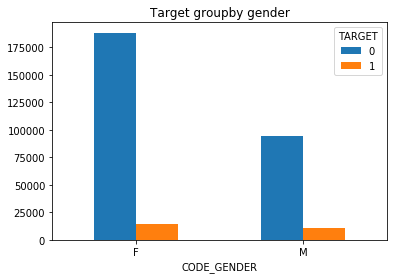

In [10]:
# bar plot
pdf00.plot.bar(rot=0, title="Target groupby gender")
plt.show()

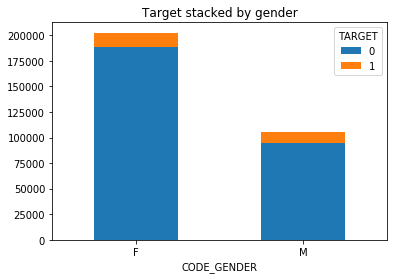

In [11]:
# bar plot (stacked)
pdf00.plot(kind="bar", stacked=True, rot=0, title="Target stacked by gender")
plt.show()

# Histogram (Continuous)

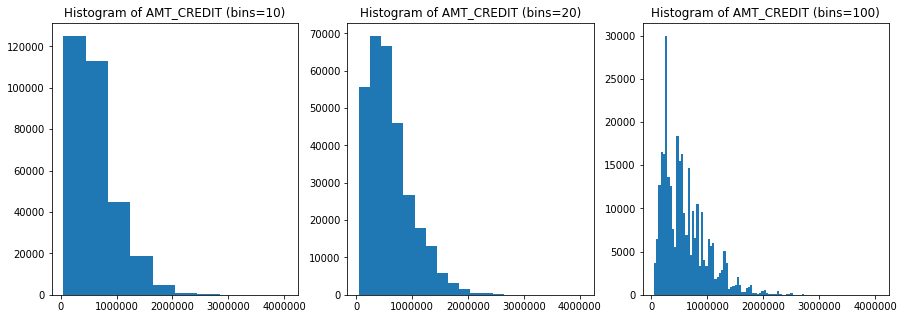

In [12]:
s00 = pdf_data["AMT_CREDIT"]

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax1.hist(s00, bins=10)
ax1.set_title("Histogram of AMT_CREDIT (bins=10)")

ax2.hist(s00, bins=20)
ax2.set_title("Histogram of AMT_CREDIT (bins=20)")

ax3.hist(s00, bins=100)
ax3.set_title("Histogram of AMT_CREDIT (bins=100)")

plt.show()

# Step chart (Ordinal, Discrete)

In [13]:
# get series data
pdf00 = pdf_data["AMT_CREDIT"].head(20)
pdf00 = (pdf00 / 1000).astype("int")
pdf00

0      406
1     1293
2      135
3      312
4      513
5      490
6     1560
7     1530
8     1019
9      405
10     652
11     148
12      80
13     918
14     773
15     299
16     509
17     270
18     157
19     544
Name: AMT_CREDIT, dtype: int64

In [14]:
cum = pdf00.cumsum()
cum_idx = list(cum.index)
cum_vals = list(cum.values)
print(cum_idx, cum_vals)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] [406, 1699, 1834, 2146, 2659, 3149, 4709, 6239, 7258, 7663, 8315, 8463, 8543, 9461, 10234, 10533, 11042, 11312, 11469, 12013]


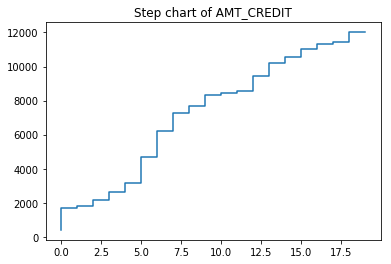

In [15]:
# step chart
fig, ax = plt.subplots()
ax.step(cum_idx, cum_vals)
ax.set_title("Step chart of AMT_CREDIT")
plt.show()

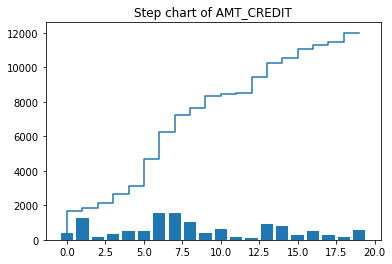

In [16]:
# step chart + bar
fig, ax = plt.subplots()
ax.step(cum_idx, cum_vals)
ax.bar(pdf00.index.tolist(), pdf00.values.tolist())
ax.set_title("Step chart of AMT_CREDIT")
plt.show()

# Boxplot (Continuous)

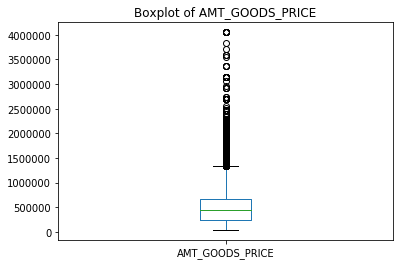

In [17]:
pdf_data["AMT_GOODS_PRICE"].plot.box(title="Boxplot of AMT_GOODS_PRICE")
plt.show()

# Scatter plot (2 variables)

In [18]:
def my_scatter_plotter(ax, pdf, var1, var2):
    pearson_corr = pdf[[var1, var2]].corr().iloc[0][1]
    ax.scatter(pdf[var1], pdf[var2])
    ax.set_title("Pearson correlation: {:.2f}".format(pearson_corr))
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)
    

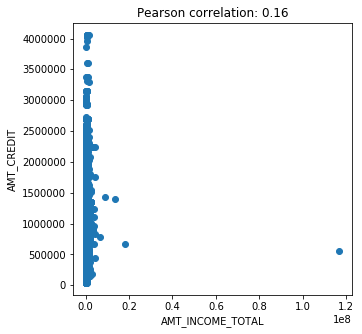

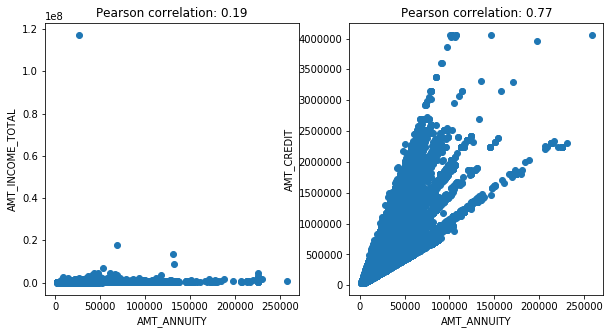

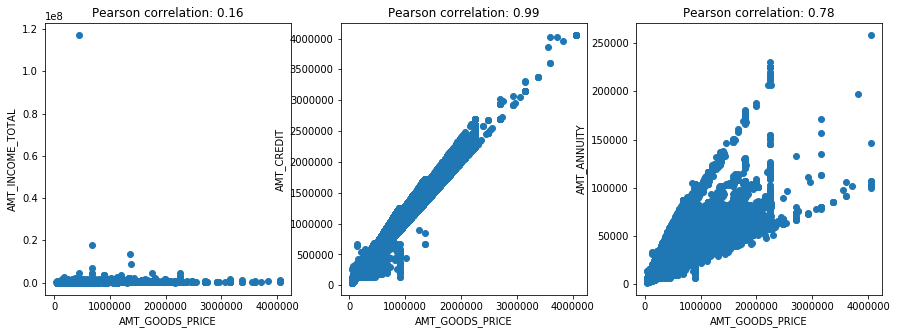

In [19]:
"""
Tính correlation giữa các cặp biến liên tiếp
ví dụ, các biến A, B, C ta sẽ tính correlation giữa AB, AC, BC
do đối xứng nên ta sẽ không tính lại BA, CA, CB
"""

# danh sách column muốn quan sát
ls_cols = [
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE'
]

n_col = len(ls_cols)
for i in range(1, n_col):
    # biến span sẽ tăng dần từ 1 đến n
    # span thể hiện phạm vi ta lấy tổ hợp để tính correlation
    span = i
    
    # mỗi dòng sẽ plot span column
    fig, axes = plt.subplots(nrows=1, ncols=span, figsize=(5 * span, 5))
    if span > 1:
        for j in range(span):        
            var1 = ls_cols[i]
            var2 = ls_cols[j]
            my_scatter_plotter(axes[j], pdf_data, var1, var2)
    else:
        var1 = ls_cols[0]
        var2 = ls_cols[1]
        my_scatter_plotter(axes, pdf_data, var1, var2)
        
    plt.show()